# Basic Tutorial of Real-Time Radial Cine Offline Reconstruction

The purpose of this notebook is to demonstrate how to use our model offline, i.e., without the FIRE scanner implementation. 

In [2]:
import os
import sys
import numpy as np 
import matplotlib.pylab as plt

sys.path.append('../OffLineIntegration')
sys.path.append('../InLineIntegration')

from data.twix_datasets import DatasetTwixRadial
from recon import nufft, network
from network_arch import Net

#### Load Example Fully-Sampled Phantom

Let's load a the k-space data for real-time cine acquisition of a  phantom. The acquisition includes 20 frames, each with 120 radial lines. We will use the `torchkbnufft` package for reconstruction. 

In [3]:
data = DatasetTwixRadial(opt=None)

twix_dir   = '/mnt/alp/Research Data Sets/ExerciseRealTimeCineRadialDL/old_versions/ExerciseRealTimeCineDL_Study1/phantoms/twix/2021_08_30_PHANTOM'
twix_fname = 'meas_MID00360_FID92331_Pre_Ex_Radial_Cine_InLine_120_Lines_144_Base_Adaptive.dat'

twix_filename = os.path.join(twix_dir, twix_fname)

kspace_data, hdr = data.load_twix(twix_filename, dtype=np.complex128)

pymapVBVD version 0.4.2
Software version: VD


Scan 1/2, read all mdhs:   0%|          | 0.00/57.0M [00:00<?, ?B/s]

Scan 2/2, read all mdhs:   0%|          | 0.00/162M [00:00<?, ?B/s]

read data:   0%|          | 0/2400 [00:00<?, ?it/s]

shape (288, 30, 120, 20)


In [4]:
n_readout_points, n_lines, n_frames, n_slices, n_coils = kspace_data.shape
print(n_readout_points, n_lines, n_frames, n_slices, n_coils)

288 120 20 1 30


In [5]:
image_recon_combined = nufft.NUFFT_prototype(kspace_data, hdr, device='cuda:5', numpoints=2, remove_n_time_frames=0)


Initialization Time: 4.1723082065582275
NUFFT Time: 4.333000421524048
eps
Time: 0.005472898483276367
Time Loop: 4.412625074386597


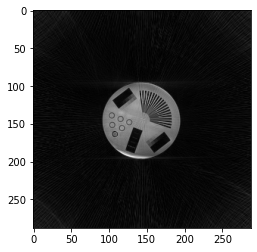

In [6]:
plt.imshow(np.abs(image_recon_combined[0,1]), cmap='gray')

#### Load Example Undersampled Phantom

We will now apply our method to an undersampled acquisition. 

In [7]:
data = DatasetTwixRadial(opt=None)

twix_dir   = '/mnt/alp/Research Data Sets/ExerciseRealTimeCineRadialDL/old_versions/ExerciseRealTimeCineDL_Study1/phantoms/twix/2021_08_30_PHANTOM'
twix_fname = 'meas_MID00359_FID92330_Pre_Ex_Radial_Cine_InLine_12_Lines_144_Base_Adaptive.dat'

twix_filename = os.path.join(twix_dir, twix_fname)

kspace_data, hdr = data.load_twix(twix_filename, dtype=np.complex128)

pymapVBVD version 0.4.2
Software version: VD


Scan 1/2, read all mdhs:   0%|          | 0.00/57.0M [00:00<?, ?B/s]

Scan 2/2, read all mdhs:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

read data:   0%|          | 0/240 [00:00<?, ?it/s]

shape (288, 30, 12, 20)


In [8]:
n_readout_points, n_lines, n_frames, n_slices, n_coils = kspace_data.shape
print(n_readout_points, n_lines, n_frames, n_slices, n_coils)

288 12 20 1 30


In [9]:
image_recon_combined = nufft.NUFFT_prototype(kspace_data, hdr, device='cuda:5', numpoints=2, remove_n_time_frames=0)


Initialization Time: 0.42763757705688477
NUFFT Time: 3.412994623184204
eps
Time: 0.00667881965637207
Time Loop: 3.480914354324341


In [10]:
model_path = '/home/mmorales/main_python/pyCMR/Spider/models/model.py'
image_recon_combinedpost_network = network.process_image(image_recon_combined, Net, model_path, use_gpu=True)

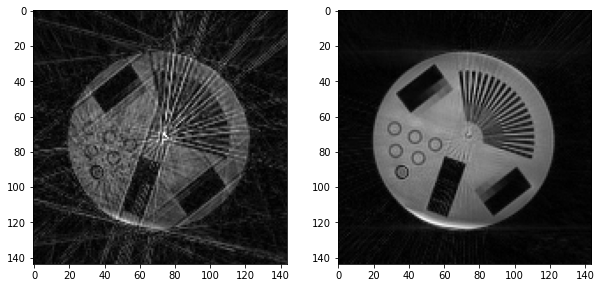

In [11]:
z_slice = 0
time_frame = 5
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(np.abs(image_recon_combined[0,time_frame,72:144+72,72:144+72]), cmap='gray', vmax=50e3); 
plt.subplot(122); plt.imshow(np.abs(image_recon_combinedpost_network[:,:,time_frame,0]), cmap='gray')

#### Load Data for Figure 2

We will now generate the figures that were included in Figure 2 of our manuscript. 

In [44]:
data = DatasetTwixRadial(opt=None)

twix_dir   = '/mnt/alp/Research Data Sets/ExerciseRealTimeCineRadialDL/bike/twix/2021_06_17_NAALF'
twix_fname = 'meas_MID00200_FID73231_Pre_Ex_Radial_Cine.dat'

twix_filename = os.path.join(twix_dir, twix_fname)

kspace_data, hdr = data.load_twix(twix_filename, dtype=np.complex128)

pymapVBVD version 0.4.2
Software version: VD


Scan 1/2, read all mdhs:   0%|          | 0.00/31.1M [00:00<?, ?B/s]

Scan 2/2, read all mdhs:   0%|          | 0.00/854M [00:00<?, ?B/s]

read data:   0%|          | 0/12720 [00:00<?, ?it/s]

/home/mmorales/miniconda3/envs/DL/lib/python3.7/site-packages/mapvbvd/twix_map_obj.py:764: RuntimeWarning: invalid value encountered in add
  raw = (raw[:, 0] + 1j * raw[:, 1]).reshape(readShape, order='F')


shape (288, 30, 10, 8, 159)


In [45]:
n_readout_points, n_lines, n_frames, n_slices, n_coils = kspace_data.shape
print(n_readout_points, n_lines, n_frames, n_slices, n_coils)

288 10 159 8 30


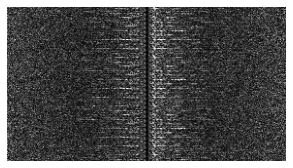

In [80]:
output_dir =  '/mnt/alp/Users/Manuel/manuscripts/ExerciseRealTimeCineRadialDL/manuscript/figure_2'

plt.figure(figsize=(5,5))
plt.imshow(np.abs(kspace_data)[:,0,:,5,0].T, cmap='gray', vmax=18);
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'kspace.png'), dpi=600, bbox_inches='tight')

In [47]:
image_recon_combined = nufft.NUFFT_prototype(kspace_data, hdr, device='cuda:5', numpoints=2, remove_n_time_frames=0)


Initialization Time: 1.967022180557251
NUFFT Time: 0.6618473529815674
eps
Time: 0.004098415374755859
NUFFT Time: 0.7521519660949707
eps
Time: 0.003996610641479492
NUFFT Time: 0.6896255016326904
eps
Time: 0.00413060188293457
NUFFT Time: 0.7409532070159912
eps
Time: 0.004423379898071289
NUFFT Time: 0.6743159294128418
eps
Time: 0.003989219665527344
NUFFT Time: 0.683096170425415
eps
Time: 0.0041713714599609375
NUFFT Time: 0.6313462257385254
eps
Time: 0.004057168960571289
NUFFT Time: 0.6602602005004883
eps
Time: 0.0041768550872802734
Time Loop: 10.462031364440918


In [48]:
from importlib import reload
reload(network)

model_path = '/home/mmorales/main_python/pyCMR/Spider/models/model.py'
image_recon_combinedpost_network = network.process_image(image_recon_combined, Net, model_path, use_gpu=True)

In [49]:
image_recon_combinedpost_network.shapee

(144, 144, 159, 8)

Text(0, 0.5, 'DRAPR')

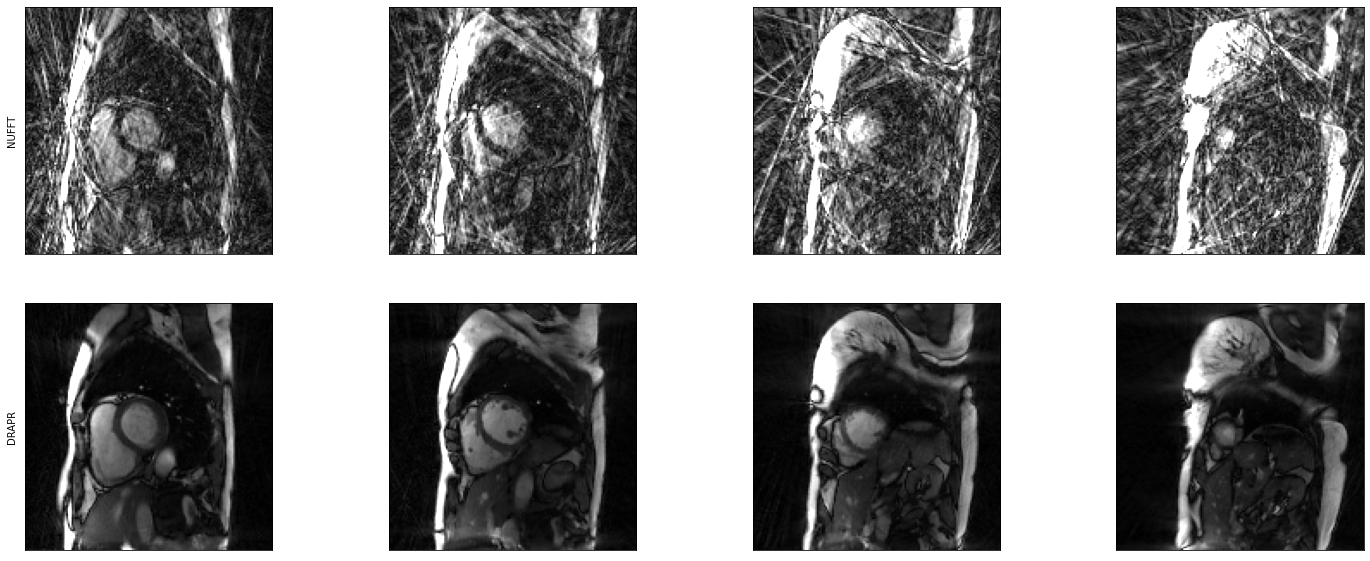

In [58]:
z_slice = 0
time_frame = 40
fig, ax = plt.subplots(2,4, figsize=(25,10))

for z_slice in range(4):
    im_nufft    = np.abs(image_recon_combined[z_slice, time_frame,72:144+72,72:144+72])
    im_nufft_dl = np.abs(image_recon_combinedpost_network[:,:,time_frame,z_slice])
    ax[0,z_slice].imshow(np.fliplr(im_nufft), cmap='gray', vmax=10e3)
    ax[1,z_slice].imshow(np.fliplr(im_nufft_dl), cmap='gray', vmax=2)

for i in range(2):
    for j in range(4):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

ax[0,0].set_ylabel('NUFFT')
ax[1,0].set_ylabel('DRAPR')

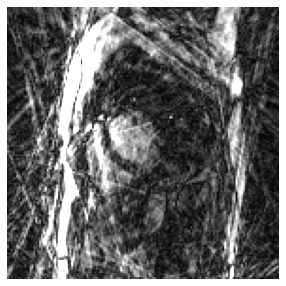

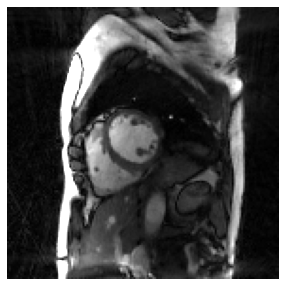

In [79]:
output_dir =  '/mnt/alp/Users/Manuel/manuscripts/ExerciseRealTimeCineRadialDL/manuscript/figure_2'

z_slice = 1
time_frame = 40
im_nufft    = np.abs(image_recon_combined[z_slice, time_frame,72:144+72,72:144+72])
im_nufft_dl = np.abs(image_recon_combinedpost_network[:,:,time_frame,z_slice])

plt.figure(figsize=(5,5))
plt.imshow(np.fliplr(im_nufft), cmap='gray', vmax=10e3)
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'post_nufft.png'), dpi=600, bbox_inches='tight')
plt.figure(figsize=(5,5))
plt.imshow(np.fliplr(im_nufft_dl), cmap='gray', vmax=1.5)
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'post_dl.png'), dpi=600, bbox_inches='tight')